In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from os.path import join as p_join

import seaborn as sns

##################################
## GLOBAL SETTINGS ###############
##################################
plt.rcParams["figure.figsize"] = (12,8)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
CLASSES = [0, 1, 2, 3]


###################################
####     SKIT-LEARN DEPS       ####
###################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm

In [2]:
import sys
sys.path.append("../../") # Adds higher directory to python modules path.
from utils import utils

### Plot accuracy graph for MLP

In [36]:
x = range(16, 21)

In [37]:
acc_1_6 = [50.75408298820036, 50.800968977104006, 50.683754004844886, 50.8556692974916,  54.56747675236384]
acc_6_6 = [66.01547237633821, 69.5319215441119, 74.69719465499726, 78.24490114870673, 80.04219739001329]
acc_7_6 = [70.46182699070094, 75.18949753848558, 80.50324294756584, 83.33984527623662, 85.47315777135266]
acc_8_6 = [73.33750097679143, 78.04954286160819, 84.25412205985778, 88.05970149253731, 88.98179260764242]
acc_10_6 = [81.32374775337969, 85.73103071032273, 91.49019301398765, 94.23302336485114, 95.31140110963507]

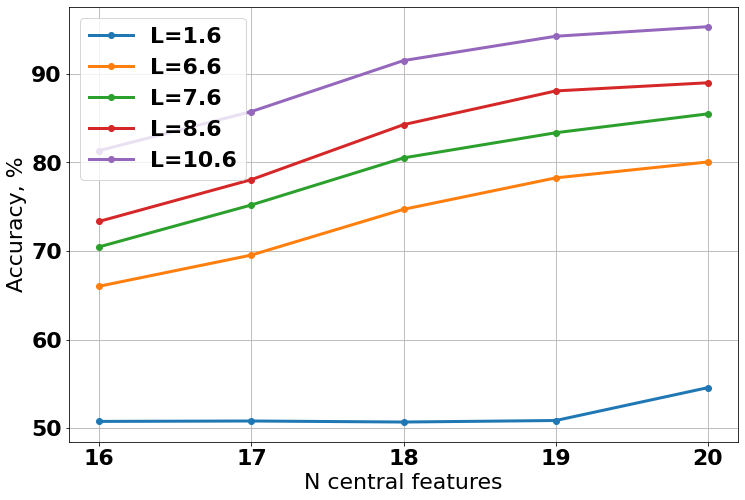

In [64]:
LW = 3
LS = '-o'
plt.plot(x, acc_1_6, LS, label='L=1.6', linewidth=LW)
plt.plot(x, acc_6_6, LS, label='L=6.6', linewidth=LW)
plt.plot(x, acc_7_6, LS, label='L=7.6', linewidth=LW)
plt.plot(x, acc_8_6, LS, label='L=8.6', linewidth=LW)
plt.plot(x, acc_10_6, LS, label='L=10.6', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend()
plt.grid()
plt.xticks(x)
pass

### Plot accuracy graph for SVM

In [66]:
acc_1_6_svm = np.array([0.494647, 0.493162, 0.498398, 0.514730, 0.553645]) * 100
acc_6_6_svm = np.array([0.691099, 0.725404, 0.768774, 0.801047, 0.821130]) * 100
acc_7_6_svm = np.array([0.723373, 0.764867, 0.821052, 0.847699, 0.864265]) * 100
acc_8_6_svm = np.array([0.735094, 0.783074, 0.849340, 0.880519, 0.891146]) * 100
acc_10_6_svm = np.array([0.799719, 0.850121, 0.904665, 0.935063, 0.946784]) * 100

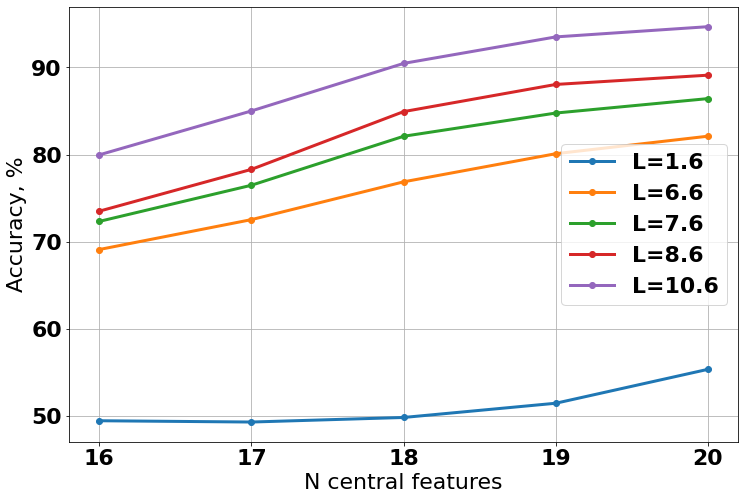

In [67]:
LW = 3
LS = '-o'
plt.plot(x, acc_1_6_svm, LS, label='L=1.6', linewidth=LW)
plt.plot(x, acc_6_6_svm, LS, label='L=6.6', linewidth=LW)
plt.plot(x, acc_7_6_svm, LS, label='L=7.6', linewidth=LW)
plt.plot(x, acc_8_6_svm, LS, label='L=8.6', linewidth=LW)
plt.plot(x, acc_10_6_svm, LS, label='L=10.6', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend()
plt.grid()
plt.xticks(x)
pass

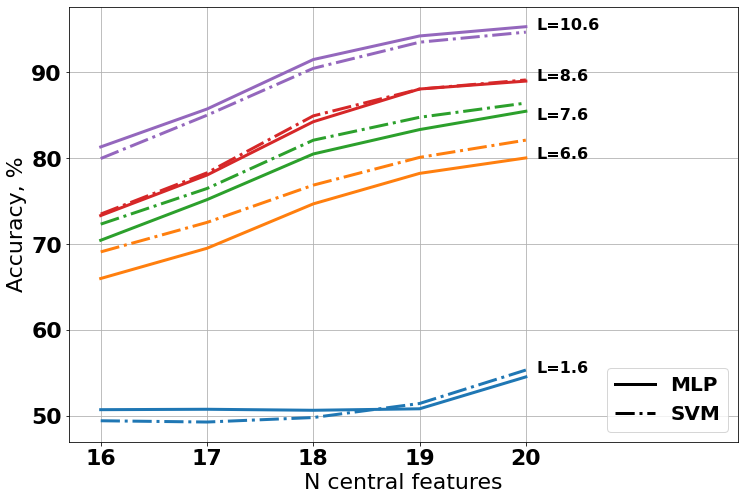

In [140]:
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'


lines = [Line2D([0], [0], color='black', linewidth=3, linestyle=LS1),
         Line2D([0], [0], color='black', linewidth=3, linestyle=LS2)]
labels = ['MLP', 'SVM']

plt.plot(x, acc_1_6, LS1, color='tab:blue', linewidth=LW)
plt.plot(x, acc_1_6_svm, LS2, color='tab:blue', linewidth=LW)
plt.plot(x, acc_6_6, LS1, color='tab:orange', linewidth=LW)
plt.plot(x, acc_6_6_svm, LS2, color='tab:orange', linewidth=LW)
plt.plot(x, acc_7_6, LS1, color='tab:green', linewidth=LW)
plt.plot(x, acc_7_6_svm, LS2, color='tab:green', linewidth=LW)
plt.plot(x, acc_8_6, LS1, color='tab:red', linewidth=LW)
plt.plot(x, acc_8_6_svm, LS2, color='tab:red', linewidth=LW)
plt.plot(x, acc_10_6, LS1, color='tab:purple', linewidth=LW)
plt.plot(x, acc_10_6_svm, LS2, color='tab:purple', linewidth=LW)
plt.xlabel('N central features')
plt.ylabel('Accuracy, %')
plt.legend(lines, labels, loc=4, prop={'size': 20})
plt.grid()
plt.xticks(x)
plt.xlim(15.7, 22)
plt.text(20.1, 55, 'L=1.6', fontsize=fs)
plt.text(20.1, 80, 'L=6.6', fontsize=fs)
plt.text(20.1, 84.5, 'L=7.6', fontsize=fs)
plt.text(20.1, 89, 'L=8.6', fontsize=fs)
plt.text(20.1, 95, 'L=10.6', fontsize=fs)
pass

In [199]:
def plot_matshow(data, x_labels, y_labels, cmap_name='YlGn'):
    df = pd.DataFrame.from_dict(data, orient='index')
    fig, ax = plt.subplots()
    cax = ax.matshow(df, cmap=plt.get_cmap(cmap_name))
    fig.colorbar(cax)
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Train')
    ax.set_xlabel('Test')
    return fig, ax

### Plot MLP on diff N

In [200]:
data_mlp = {'21': [98.074519, 2.294324, 73.412103, 1.744186],
            '23': [3.194549, 96.942986, 0.168792, 87.871968],
            '25': [76.594149, 0.193798, 96.892973, 0.012503],
            '27': [2.425606, 91.785446, 0.056264, 96.524131]}

/tmp/ipykernel_189552/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_189552/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


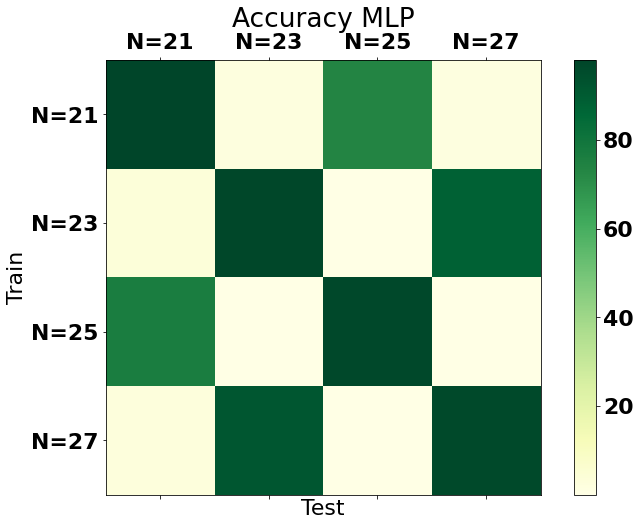

In [201]:
ticks = ['N=21', 'N=23', 'N=25', 'N=27']
fig_mlp, ax_mlp = plot_matshow(data_mlp, [' '] + ticks, [' '] + ticks)
ax_mlp.set_title('Accuracy MLP')
pass

### Plot SVM on diff N

In [202]:
data_svm = {'21': [0.985809, 0.014254, 0.768067, 0.012066],
            '23': [0.024569, 0.970743, 0.000563, 0.844836],
            '25': [0.733371, 0.002938, 0.968555, 0.000125],
            '27': [0.019067, 0.821455, 0.000125, 0.967304]}

/tmp/ipykernel_189552/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_189552/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


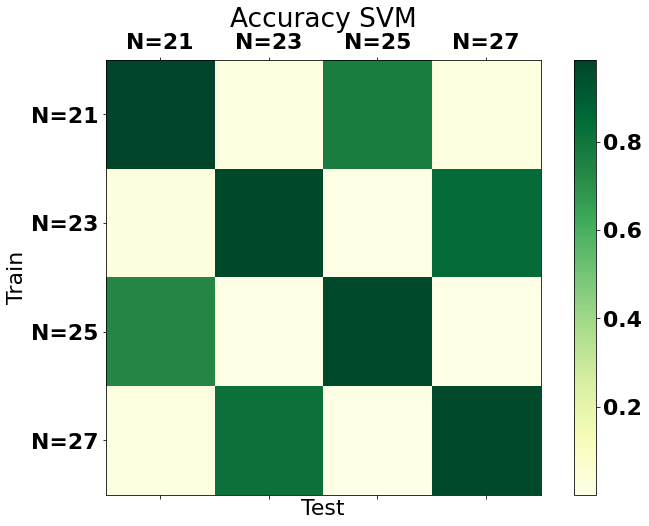

In [204]:
ticks = ['N=21', 'N=23', 'N=25', 'N=27']
fig_svm, ax_svm = plot_matshow(data_svm, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy SVM')
pass

### Plot Mlp on diff L

In [231]:
data_mlp_l = {'1.6': [50.894741, 21.544112, 21.927014, 31.405798, 30.022662],
              '6.6': [15.667735, 66.015472, 40.947097, 26.334297, 25.529421],
              '7.6': [21.372197, 39.282644, 70.461827, 33.632883, 24.349457],
              '8.6': [25.490349, 31.734000, 39.290459, 73.337501, 32.359147],
              '10.6': [36.125654, 24.404157, 27.209502, 33.679769, 81.323748]}

/tmp/ipykernel_189552/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_189552/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


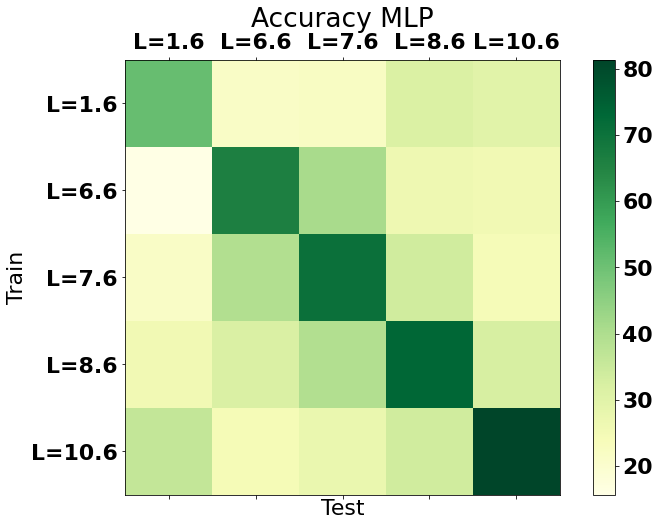

In [233]:
ticks = ['L=1.6', 'L=6.6','L=7.6','L=8.6', 'L=10.6']
fig_svm, ax_svm = plot_matshow(data_mlp_l, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy MLP')
pass

### Plot SVM on diff L

In [235]:
data_svm_l = {'1.6': [0.494647, 0.194421, 0.176369, 0.219583, 0.354927],
              '6.6': [0.207080, 0.691099, 0.393452, 0.321403, 0.207002],
              '7.6': [0.237556, 0.423771, 0.723373, 0.391498, 0.236305],
              '8.6': [0.311245, 0.294366, 0.348363, 0.735094, 0.350004],
              '10.6': [0.303118, 0.222943, 0.254591, 0.291709, 0.799719]}

/tmp/ipykernel_189552/1880814539.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels)
/tmp/ipykernel_189552/1880814539.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels)


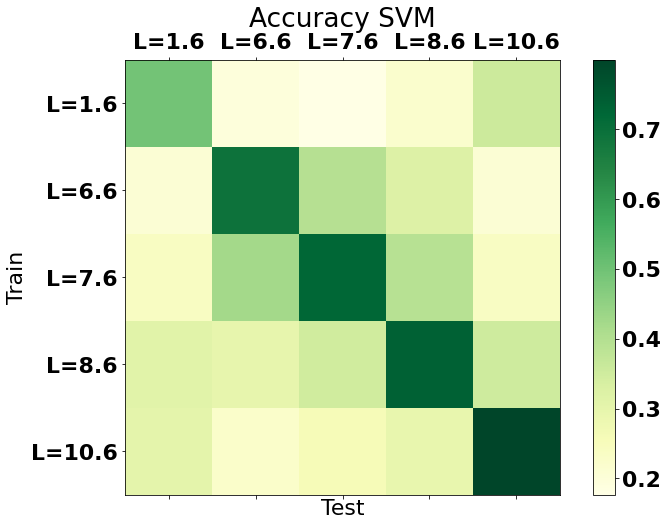

In [236]:
ticks = ['L=1.6', 'L=6.6','L=7.6','L=8.6', 'L=10.6']
fig_svm, ax_svm = plot_matshow(data_svm_l, [' '] + ticks, [' '] + ticks)
ax_svm.set_title('Accuracy SVM')
pass


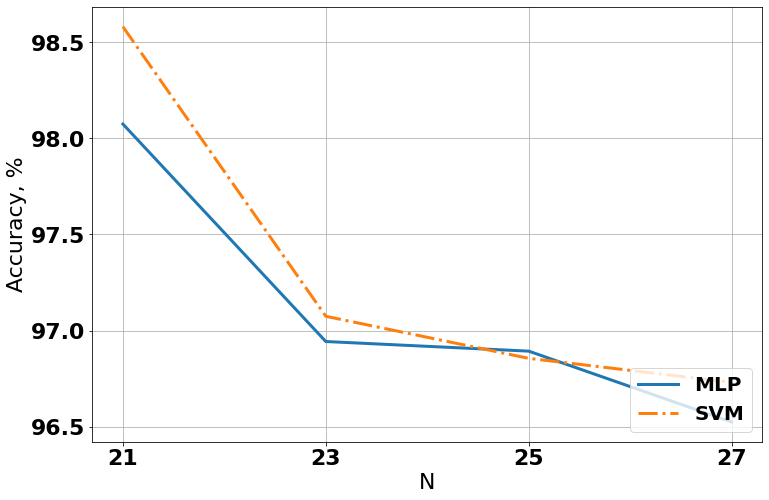

In [247]:
# 16 center features
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'


x = [21, 23, 25, 27]

acc_mlp_diff_n = [data_mlp[l][i] for i, l in enumerate(['21', '23', '25', '27'])]
acc_svm_diff_n = [data_svm[l][i]*100 for i, l in enumerate(['21', '23', '25', '27'])]
plt.plot(x, acc_mlp_diff_n, LS1, label='MLP', linewidth=LW)
plt.plot(x, acc_svm_diff_n, LS2, label='SVM', linewidth=LW)
plt.xlabel('N')
plt.ylabel('Accuracy, %')
plt.legend(loc=4, prop={'size': 20})
plt.xticks(x)
plt.grid()

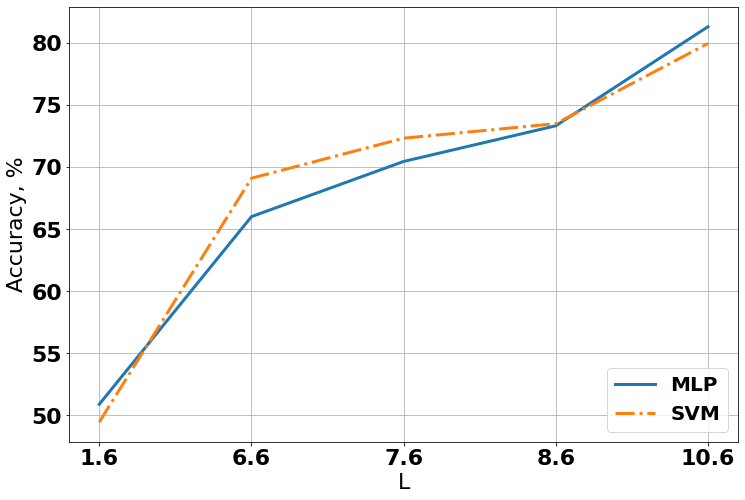

In [259]:
# 16 center features
from matplotlib.lines import Line2D

fs = 16
LW = 3
LS1 = '-'
LS2 = '-.'


x = range(5)
xx = [1.6, 6.6, 7.6, 8.6, 10.6]
L = [str(i) for i in xx]

acc_mlp_diff_l = [data_mlp_l[l][i] for i, l in enumerate(L)]
acc_svm_diff_l = [data_svm_l[l][i]*100 for i, l in enumerate(L)]
plt.plot(x, acc_mlp_diff_l, LS1, label='MLP', linewidth=LW)
plt.plot(x, acc_svm_diff_l, LS2, label='SVM', linewidth=LW)
plt.xlabel('L')
plt.ylabel('Accuracy, %')
plt.legend(loc=4, prop={'size': 20})
plt.xticks(x, L)
plt.grid()